In [4]:
import csv
import math
import pandas as pd
from scipy.stats import poisson
from scipy.stats import laplace
from scipy.stats import gennorm
from diffprivlib.mechanisms import Laplace
import matplotlib.pyplot as plt

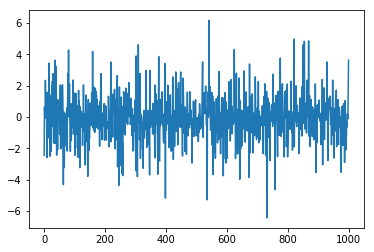

In [5]:
poiss = poisson.rvs(40, size=1000)
norm = gennorm.rvs(.5, size=1000)
laplace = laplace.rvs(size=1000)
def tohisto(data):
    histod = []
    for i in range(math.ceil(max(data))):
        histod.append(0)
        for x in data:
            if i == x:
                histod[i] = histod[i] + 1
    return histod

def is_int(num):
    return str(num).replace('.','') == str(num)

plt.plot(laplace)

In [99]:
df = pd.read_csv('./Sample Data/R01E01D01.csv')
print(df.columns)
df.dtypes

print(df['2nd reduction'].dtype)


Index(['ID', 'Form', '1st reduction', '2nd reduction', 'trial', 'duration',
       '3D deviation', 'XY deviation', 'XY directed', 'Z deviation',
       'Z directed', 'Z std deviation '],
      dtype='object')
object


In [101]:
def privatise(column):
    laplace = Laplace()
    if df[column].dtype == 'int64':
        laplace.set_epsilon(1)
        laplace.set_sensitivity(df[column].mean()*0.1)
        df[column] = df[column].apply(laplace.randomise).round(0).astype(int)
#     elif df[column].dtype == 'object':
#         vals = df[column].unique()
#         mapping = dict([(y,x) for x,y in enumerate(sorted(set(vals)))]) 
#         rev_map = {k: v for k, v in enumerate(mapping)}
#         print(rev_map)
#         df[column] = df[column].map(mapping)
#         laplace.set_epsilon(1)
#         laplace.set_sensitivity(df[column].mean()*0.5)
#         df[column] = df[column].apply(laplace.randomise).round(0).astype(int)
#         print(rev_map)
#         df[column] = df[column].map(rev_map)
    elif df[column].dtype == 'float64':
        laplace.set_epsilon(1)
        laplace.set_sensitivity(df[column].mean()*0.1)
        df[column] = df[column].apply(laplace.randomise)
    else:
        print(column + ' Datatype not obfuscatable')

privatise('duration')
privatise('XY deviation')
print(df)

      ID    Form 1st reduction 2nd reduction  trial      duration  \
0      1  circle       virtual          line      1   6275.292448   
1      1  circle       virtual          line      2   5443.162559   
2      1  circle       virtual          line      3   6438.830924   
3      1  circle       virtual          line      4   5663.553947   
4      1  circle       virtual          line      5   4393.320473   
5      1  square       virtual          line      1   4739.506998   
6      1  square       virtual          line      2   6872.452221   
7      1  square       virtual          line      3   5963.512188   
8      1  square       virtual          line      4  10106.946190   
9      1  square       virtual          line      5   7074.571791   
10     1  circle       virtual       nothing      1   6899.122678   
11     1  circle       virtual       nothing      2   3366.219473   
12     1  circle       virtual       nothing      3   5214.942645   
13     1  circle       virtual    